## Data exploration

Fastai conda env

In [1]:
import os
from fastai.structured import *
from fastai.column_data import *
import seaborn as sns

In [2]:
import time

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
INPUT_PATH='../input/'
PATH='../input/merged_data/'
FIGS = 'plots/'

In [5]:
df = pd.read_csv('{0}acorn_details.csv'.format(PATH))

In [6]:
df.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


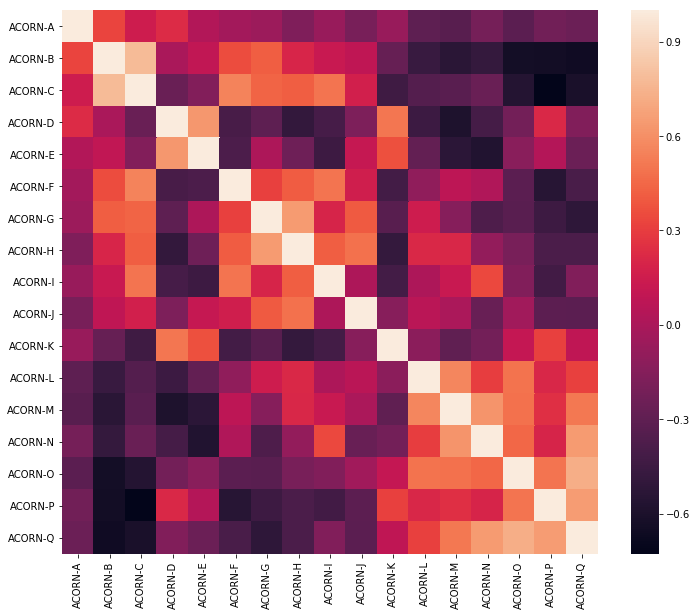

In [14]:
f, ax = plt.subplots(figsize=(12, 10))
corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

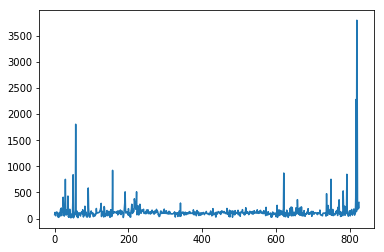

In [15]:
a = df["ACORN-A"]
a.plot()

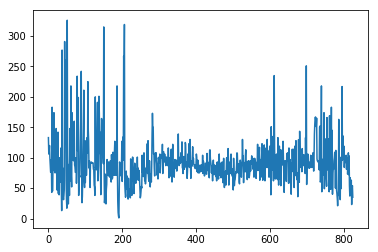

In [17]:
q = df["ACORN-Q"]
ax.set_xticklabels(<your labels>, rotation=0)
q.plot()

## Daily data

Here we check the individual daily_dataset files against the merged data we merged in notebook 1_0

code after london_smartmeters.ipynb

In [50]:
df_raw = pd.read_csv(f'{PATH}daily_all.csv')
df_raw["day"]=pd.to_datetime(df_raw["day"])

In [51]:
df_raw["day"]=pd.to_datetime(df_raw["day"])

In [57]:
df_raw_count=df_raw.groupby(["day"]).count()
df_raw_count = df_raw_count['LCLid']

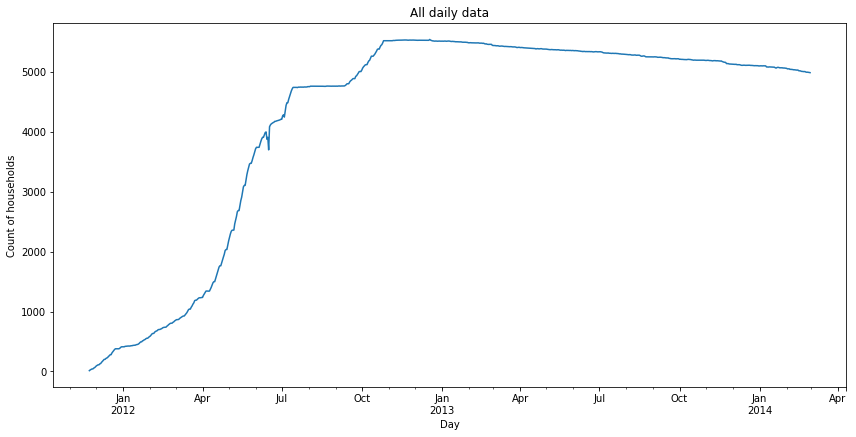

In [58]:
fig,ax=plt.subplots(figsize=(12,6))
df_raw_count.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
fig.tight_layout()
plt.title('All daily data')
plt.show()

In [7]:
df_filtered = pd.read_csv(f'{PATH}daily_all_48hh.csv')
df_filtered["day"]=pd.to_datetime(df_filtered["day"])

In [33]:
len(df_filtered)

3469352

In [8]:
df_filtered_count=df_filtered.groupby(["day"]).count()
df_filtered_count = df_filtered_count['LCLid']

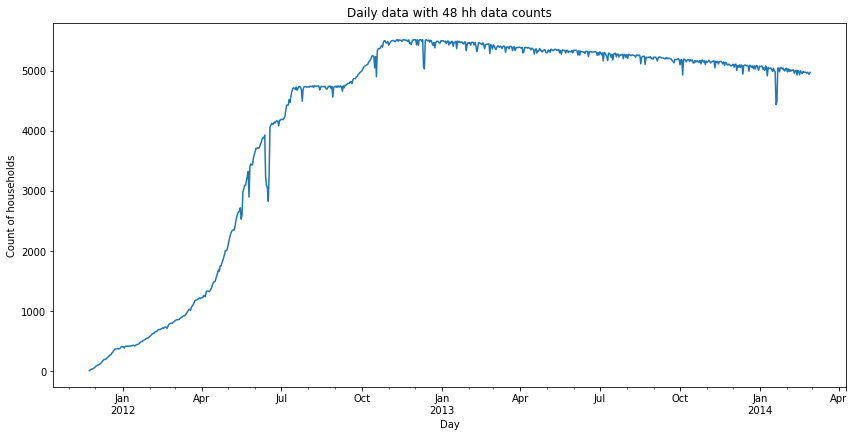

In [9]:
fig,ax=plt.subplots(figsize=(12,6))
df_filtered_count.plot(ax=ax)
plt.xlabel("Day")
plt.ylabel("Count of households")
fig.tight_layout()
plt.title('Daily data with 48 hh data counts')
ax.figure.savefig(f'{FIGS}count_householdday.png')
plt.show()

August 2012 onwards we have >4500 households, with November 2012 being the optimal month for data capture

### Plot daily data

In [10]:
df_range = df_filtered.sort_values(by=['day'])
df_range = df_range.iloc[[0, -1]]
df_range.head()

,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min
246138,1,MAC000155,2011-11-24,0.222,0.301688,1.005,48,0.234816,14.481,0.083
3469351,31183,MAC002072,2014-02-27,0.054,0.068146,0.553,48,0.080033,3.271,0.018


In [11]:
df_filtered['day_count'] = (df_filtered['day']) - pd.datetime(2011,11,24)

In [12]:
#convert day_count to float
df_filtered['day_count'] = df_filtered['day_count'].astype('timedelta64[D]')

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


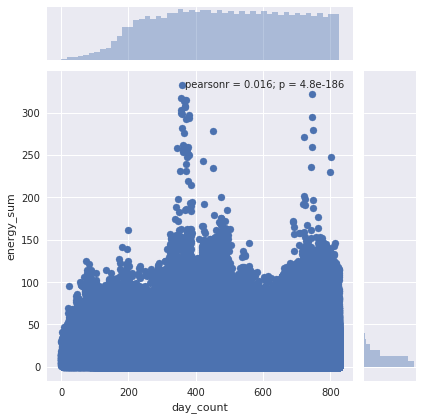

In [44]:
sns.jointplot(x="day_count", y="energy_sum", data=df_filtered)

In [ ]:
sns.jointplot(x="day_count", y="energy_sum", data=df_filtered, kind="kde")

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


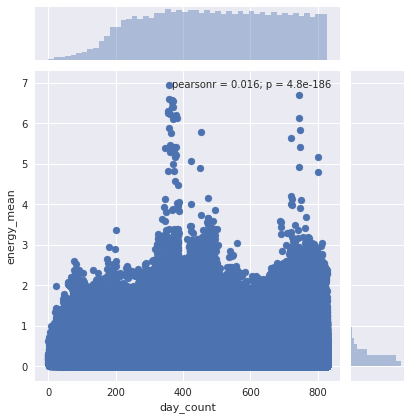

In [45]:
sns.jointplot(x="day_count", y="energy_mean", data=df_filtered)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


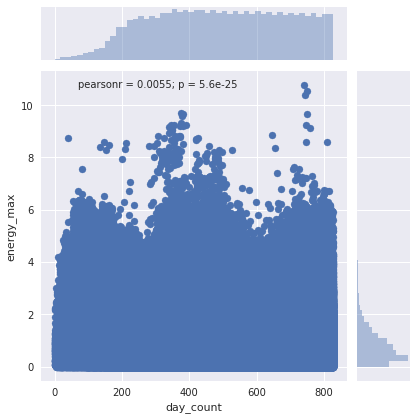

In [46]:
sns.jointplot(x="day_count", y="energy_max", data=df_filtered)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


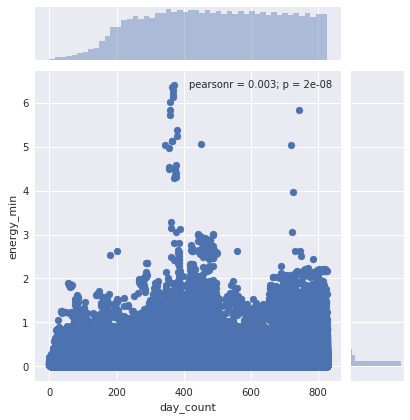

In [47]:
sns.jointplot(x="day_count", y="energy_min", data=df_filtered)

Similar distribution of energry sum for households vs day from start to energy mean.

Clear cyclicity to maximum and (maximum of) minimum energy use in winter periods

### One week plots

### One day plots

### Data per household

In [13]:
start_date=datetime.datetime(year=2012,month=8,day=1)
end_date=datetime.datetime(year=2014,month=3,day=1)

In [14]:
# Data subset
df_filtered_subset=df_filtered[(df_filtered["day"]>=start_date) & (df_filtered["day"]<end_date)]

In [15]:
df_filtered_subset=df_filtered_subset.reset_index()

In [32]:
len(df_filtered_subset)

3004509

In [16]:
sns.set(color_codes=True)
data=df_filtered_subset.groupby(["LCLid"]).count()
data=data['energy_sum']

In [17]:
data.head()

LCLid
MAC000002    498
MAC000003    574
MAC000004    575
MAC000005    574
MAC000006    573
Name: energy_sum, dtype: int64

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


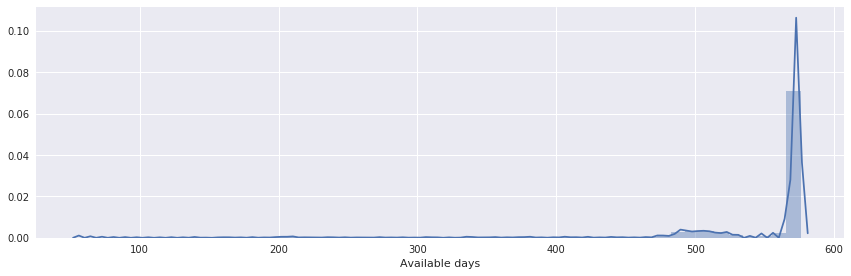

In [17]:

fig,ax=plt.subplots(figsize=(12,4))
sns.distplot(data)
plt.xlabel("Available days")
fig.tight_layout()
plt.show()
#ax.figure.savefig(folder_savepicture+"boxplot_availalbedayhousehold.png")

### Subset the data 

In [47]:
df_filtered_subset_count = df_filtered_subset.groupby(['LCLid']).size().reset_index(name='counts')

In [48]:
df_filtered_subset_count.head()

,LCLid,counts
0,MAC000002,498
1,MAC000003,574
2,MAC000004,575
3,MAC000005,574
4,MAC000006,573


In [53]:
#subset by households with >=365 days of data
cluster_dataset=df_filtered_subset_count.loc[df_filtered_subset_count['counts'] > 365]

In [54]:
cluster_dataset[:2]

,LCLid,counts
0,MAC000002,498
1,MAC000003,574


In [55]:
len(cluster_dataset)

5275

Get first and last days

In [22]:
df_range = df_filtered_subset.sort_values(by=['day'])
df_range = df_range.iloc[[0, -1]]
df_range.head()

,index,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,day_count
0,229,231,MAC000118,2012-08-01,0.091,0.112188,0.270,48,0.053445,5.385,0.058,251.0
3004508,3469351,31183,MAC002072,2014-02-27,0.054,0.068146,0.553,48,0.080033,3.271,0.018,826.0


In [42]:
len(df_filtered_subset), len(cluster_dataset)

(3004509, 5556)

In [58]:
cluster_df = df_filtered_subset.loc[df_filtered_subset['LCLid'].isin(cluster_dataset['LCLid'])]


In [59]:
len(cluster_df)

2936913

In [60]:
cluster_df['day_count'] = (cluster_df['day']) - pd.datetime(2012,8,1)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [61]:
#convert day_count to float
cluster_df['day_count'] = cluster_df['day_count'].astype('timedelta64[D]')

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
cluster_df.head()

,index,Unnamed: 0,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,day_count
0,229,231,MAC000118,2012-08-01,0.0910,0.112188,0.270,48,0.053445,5.385,0.058,0.0
1,230,232,MAC000118,2012-08-02,0.0910,0.118250,0.408,48,0.069946,5.676,0.062,1.0
2,231,233,MAC000118,2012-08-03,0.1195,0.143250,0.486,48,0.091924,6.876,0.060,2.0
3,232,234,MAC000118,2012-08-04,0.1135,0.164583,0.509,48,0.121292,7.900,0.060,3.0
4,233,235,MAC000118,2012-08-05,0.1390,0.210625,0.869,48,0.161252,10.110,0.081,4.0


In [63]:
cluster_df.drop(columns=['index','Unnamed: 0'], inplace=True)

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


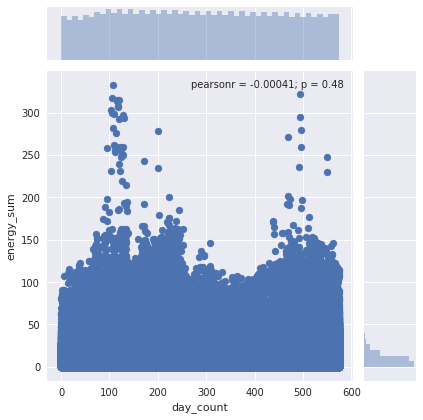

In [39]:
sns.jointplot(x="day_count", y="energy_sum", data=cluster_df)

In [64]:
cluster_df.to_csv(f'{PATH}daily_for_clustering.csv')

In [ ]:
#sns.pairplot(cluster_df)

In [65]:
data=cluster_df.groupby(["LCLid"]).count()
data=data['energy_sum']

/home/walle/miniconda3/envs/fastai/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


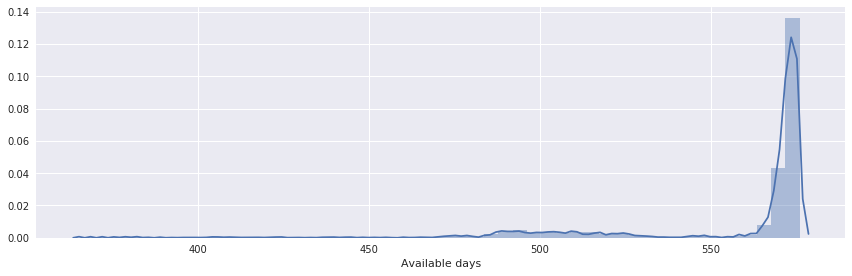

In [66]:
fig,ax=plt.subplots(figsize=(12,4))
sns.distplot(data)
plt.xlabel("Available days")
fig.tight_layout()
plt.show()